## Problem Statement 

### Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people intodifferent classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by usingany 4 different classification algorithms. Now you have to build a model whichcan classify people into different classes.Dataset This is the Dataset You can use this dataset for this question.

In [1]:
#import neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#load data
df = pd.read_csv('../dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
#checking no of rows and columns
df.shape

(2111, 17)

- Dataset have 17 features and 2111 entries.

In [5]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

- Data types are correct
- N0 missing values

In [7]:
#checking missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [9]:
df.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


<AxesSubplot:>

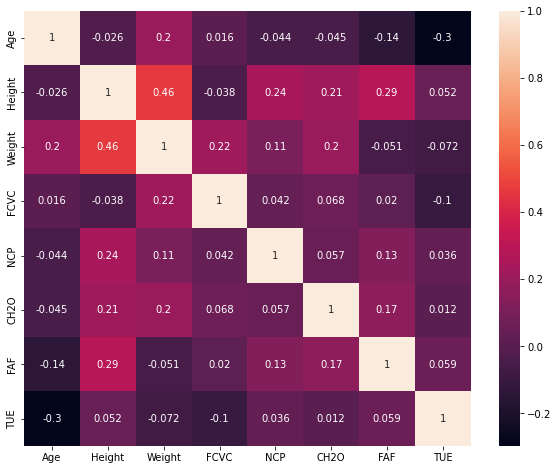

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

- No correlation between dependent features. No collinearity between features.

In [11]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [12]:
df_num = df[num_col]
df_cat = df[cat_col]

In [13]:
df_num

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [14]:
df_cat

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
#checking distribution of numerical features

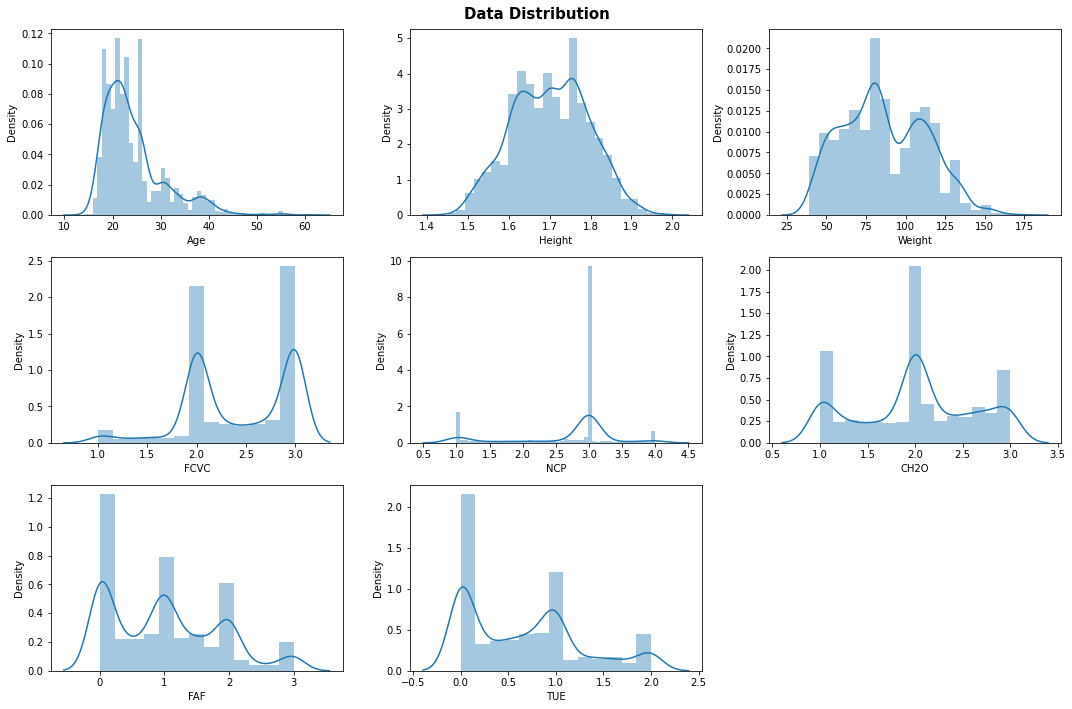

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Data Distribution', fontsize=15, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(3, 3, i+1)
    sns.distplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [17]:
statistic_age, p_value_age = shapiro(df['Age'])
statistic_height, p_value_height = shapiro(df['Height'])
statistic_weight, p_value_weight = shapiro(df['Weight'])
statistic_FCVC, p_value_FCVC = shapiro(df['FCVC'])
statistic_NCP, p_value_age = shapiro(df['NCP'])
statistic_CH2O, p_value_CH2O = shapiro(df['CH2O'])
statistic_FAF, p_value_FAF = shapiro(df['FAF'])
statistic_TUE, p_value_TUE = shapiro(df['TUE'])


print(statistic_age, p_value_age)
print(statistic_height, p_value_height)
print(statistic_weight, p_value_weight)
print(statistic_FCVC, p_value_FCVC)
print(statistic_NCP, p_value_age)
print(statistic_CH2O, p_value_CH2O)
print(statistic_FAF, p_value_FAF)
print(statistic_TUE, p_value_TUE)

0.8660634756088257 0.0
0.993234395980835 2.7733422669484753e-08
0.9764994382858276 3.76608053706003e-18
0.844896674156189 2.429010758060638e-41
0.7409582138061523 0.0
0.9336119294166565 1.1141806407150354e-29
0.9151784777641296 7.706621779227536e-33
0.8861498832702637 7.387927557275335e-37


- Since p_value is less than 0.05,all numerical features does not follow normal distribution.
- Data distribution is right skewed.

In [18]:
#checking outliers

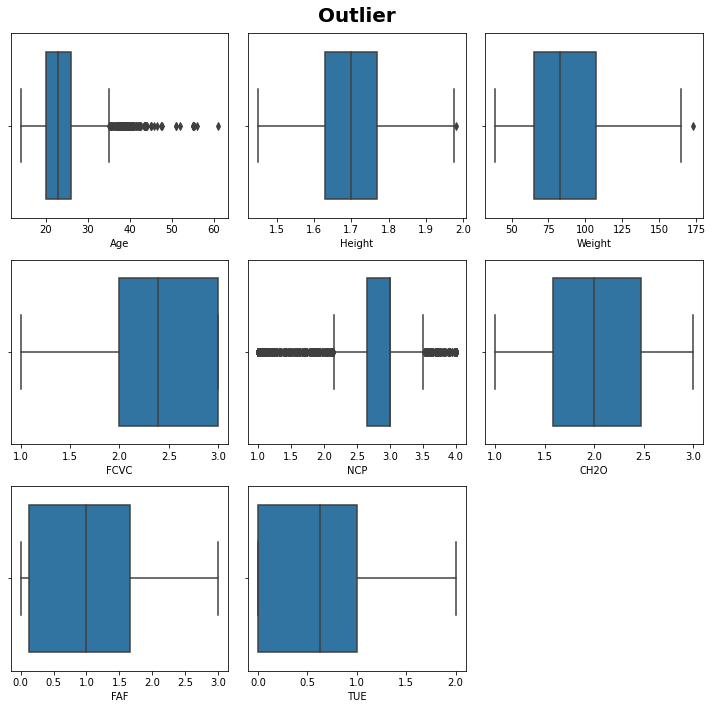

In [19]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

- `Age`,`Height`,`Weight`,`NCP` have outliers

In [20]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [21]:
cat_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

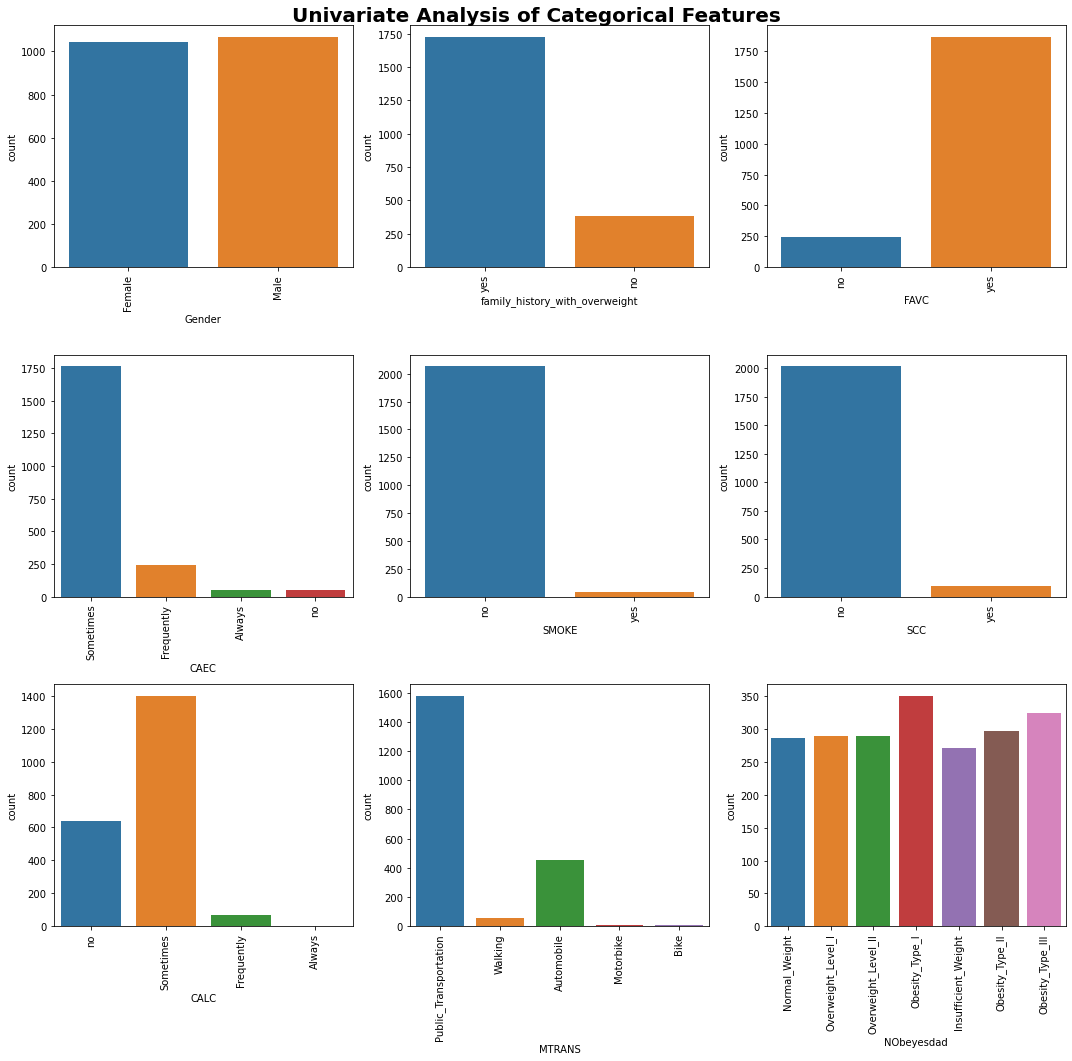

In [22]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cat_col[i]],data = df)
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

- `NObeyesdad` and `Gender` having balanced data
- Reamaining cat feature have highly imbalanced data 

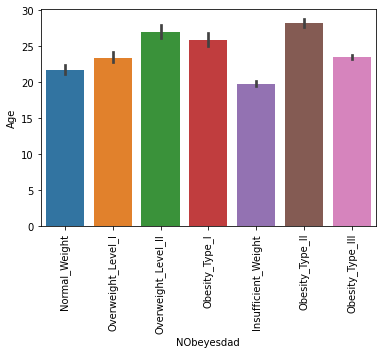

In [23]:
# NObeyesdad vs Age
sns.barplot(data=df, x='NObeyesdad', y='Age')
plt.xticks(rotation=90)
plt.show()

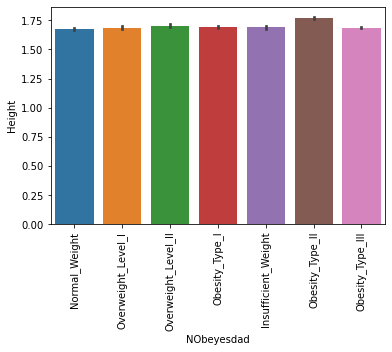

In [24]:
# NObeyesdad vs Height
sns.barplot(data=df, x='NObeyesdad', y='Height')
plt.xticks(rotation=90)
plt.show()

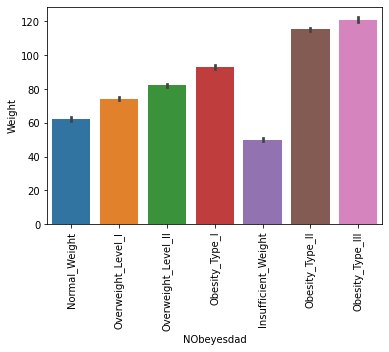

In [25]:
# NObeyesdad vs Weight
sns.barplot(data=df, x='NObeyesdad', y='Weight')
plt.xticks(rotation=90)
plt.show()

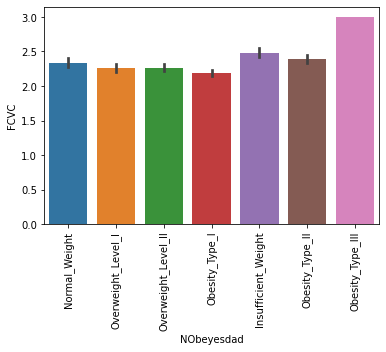

In [26]:
# NObeyesdad vs FCVC
sns.barplot(data=df, x='NObeyesdad', y='FCVC')
plt.xticks(rotation=90)
plt.show()

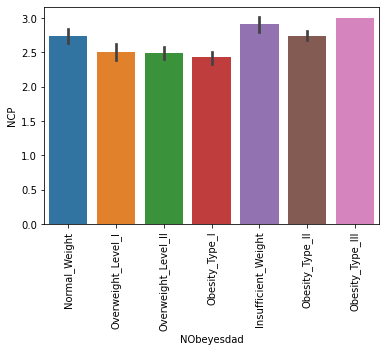

In [27]:
# NObeyesdad vs NCP
sns.barplot(data=df, x='NObeyesdad', y='NCP')
plt.xticks(rotation=90)
plt.show()

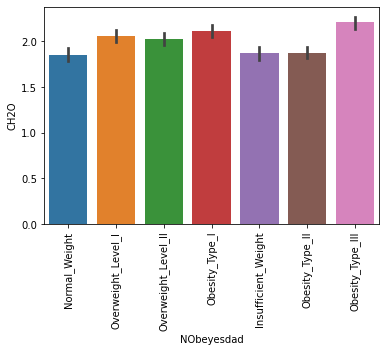

In [28]:
# NObeyesdad vs CH2O
sns.barplot(data=df, x='NObeyesdad', y='CH2O')
plt.xticks(rotation=90)
plt.show()

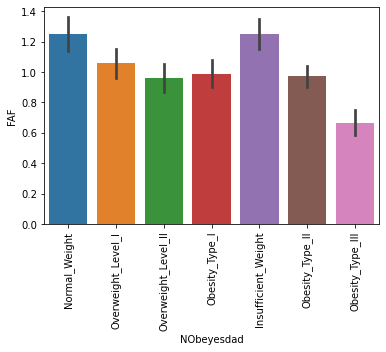

In [29]:
# NObeyesdad vs FAF
sns.barplot(data=df, x='NObeyesdad', y='FAF')
plt.xticks(rotation=90)
plt.show()

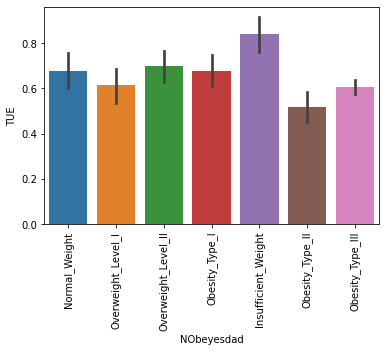

In [30]:
# NObeyesdad vs TUE
sns.barplot(data=df, x='NObeyesdad', y='TUE')
plt.xticks(rotation=90)
plt.show()

In [31]:
cat_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [32]:
num_col

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

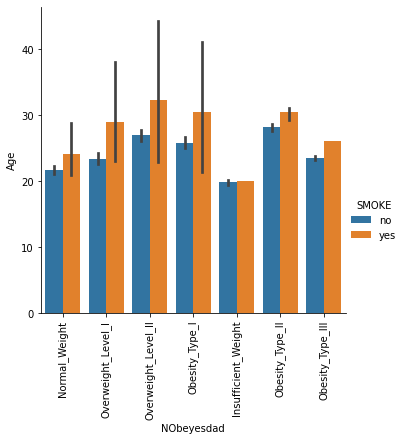

In [33]:
sns.catplot(x="NObeyesdad", y="Age",
                   hue="SMOKE",
                    data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

- People who smokes have obesity issues.

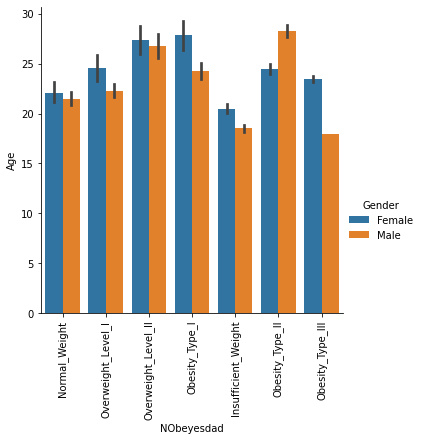

In [34]:
sns.catplot(x="NObeyesdad", y="Age",
                   hue="Gender",
                    data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

- Females have obesity issues

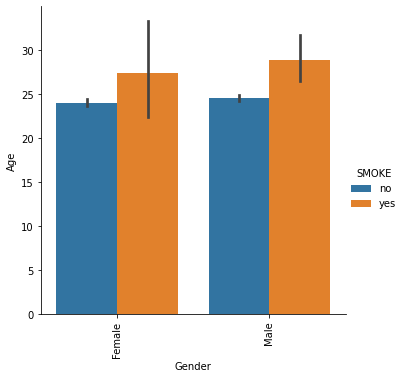

In [35]:
sns.catplot(x="Gender", y="Age",hue="SMOKE",data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

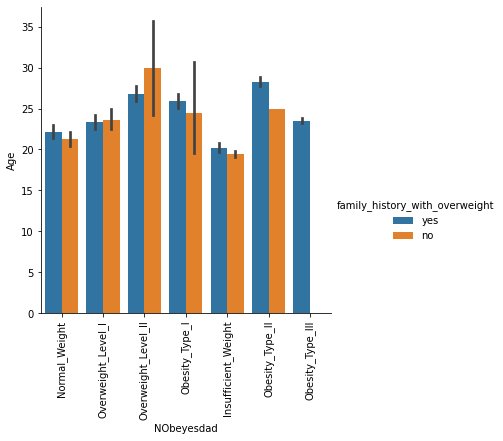

In [36]:
sns.catplot(x="NObeyesdad", y="Age",
                   hue="family_history_with_overweight",
                    data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

In [37]:
#Outlier handling

In [38]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [39]:
for columns in df_num:
    handling_outliers(df,columns)

Age --- IQR ---> 6.052807999999999
Lower Fence: 10.867980000000003
Higher Fence: 35.079212
______________________________________________
Height --- IQR ---> 0.13846400000000014
Lower Fence: 1.4223039999999996
Higher Fence: 1.9761600000000001
______________________________________________
Weight --- IQR ---> 41.957339000000005
Lower Fence: 2.537334499999993
Higher Fence: 170.3666905
______________________________________________
FCVC --- IQR ---> 1.0
Lower Fence: 0.5
Higher Fence: 4.5
______________________________________________
NCP --- IQR ---> 0.34126199999999995
Lower Fence: 2.146845
Higher Fence: 3.5118929999999997
______________________________________________
CH2O --- IQR ---> 0.8926075
Lower Fence: 0.24590124999999996
Higher Fence: 3.81633125
______________________________________________
FAF --- IQR ---> 1.5421725
Lower Fence: -2.18875375
Higher Fence: 3.97993625
______________________________________________
TUE --- IQR ---> 1.0
Lower Fence: -1.5
Higher Fence: 2.5
__________

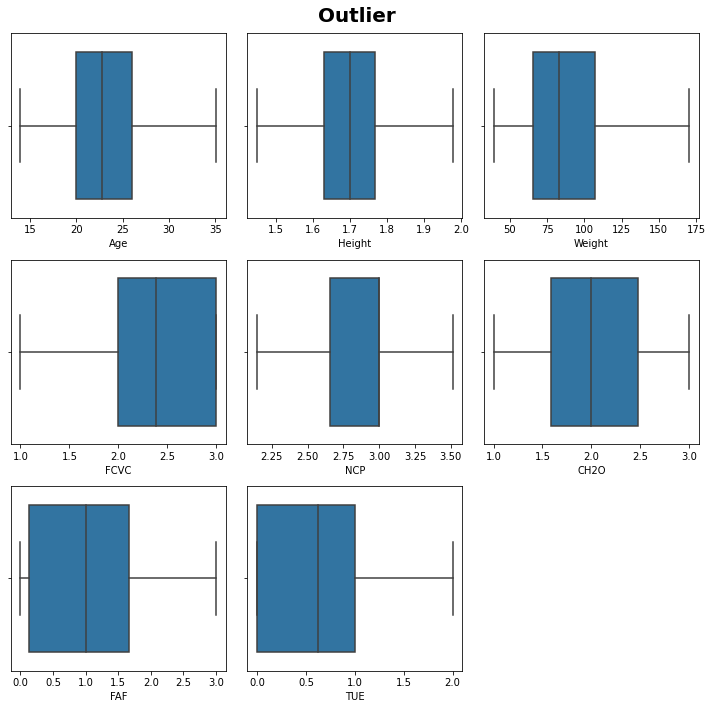

In [40]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [41]:
#encoding target feature
le_enc = LabelEncoder()
df['NObeyesdad'] = le_enc.fit_transform(df['NObeyesdad'])

In [42]:
# Split the data into training and testing sets
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [43]:
cat_col

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [44]:
# Creating new variables for numerical attributes/columns
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(transformers=[
                                                ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features),
                                            ])

In [45]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Random Forest

In [47]:
#Model Training
rf = Pipeline(steps=[('prepocessor', preprocessor), 
                     ('Random Forest Classifier', RandomForestClassifier())])
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

#Model evaluation
test_acc_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_rf)

Accuracy: 0.9456264775413712


In [48]:
#Gradient Boosting

In [49]:
#Model Training
gb = Pipeline(steps=[('prepocessor', preprocessor), ('Gradient Boosting Classifier', GradientBoostingClassifier())])
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

#Model evaluation
test_acc_gb = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_gb)

Accuracy: 0.9385342789598109


In [50]:
#KNN Classifier

In [51]:
#Model Training
knn = Pipeline(steps=[('prepocessor', preprocessor), ('KNN Classifier', KNeighborsClassifier())])
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

#Model evaluation
test_acc_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_knn)

Accuracy: 0.8321513002364066


In [52]:
#XGBoost

In [53]:
#Model Training
xgb = Pipeline(steps=[('prepocessor', preprocessor), ('XGBoost Classifier', XGBClassifier())])
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

#Model evaluation
test_acc_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_xgb)

Accuracy: 0.9574468085106383


In [54]:
models = pd.DataFrame({
    'Model' : ['Random Forest','Gradient Boosting','KNN','XGBoost'],
    'Accuracy' : [test_acc_rf,test_acc_gb,test_acc_knn,test_acc_xgb],
})

best_model =models.sort_values(by='Accuracy', ascending=False)
best_model

,Model,Accuracy
3,XGBoost,0.957447
0,Random Forest,0.945626
1,Gradient Boosting,0.938534
2,KNN,0.832151


- XGB classifier performs better.

In [55]:
class_report_xgb = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.87      0.91        62
           2       0.97      0.95      0.96        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.98      1.00      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [56]:
y_pred[0:10]

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0], dtype=int64)

In [57]:
for i in le_enc.inverse_transform(y_pred[0:5]):
    print(i)

Insufficient_Weight
Obesity_Type_III
Insufficient_Weight
Insufficient_Weight
Normal_Weight
